# Machine Learning Model to predict Lead Scores

This file obtains a compiled and pre-processed dataset of records containing various types of information about Law Firms from across 48 States of USA. Machine Learning techniques are employed to predict how many of these firms are most likely to engage with the Sales personnel from our company. Our model also indicates particular criterias from the dataset that impact the prediction of the Lead Scores most.

#### Rubric to score the criteria being used for predicting Lead Scores on the Law Firms from the dataset.

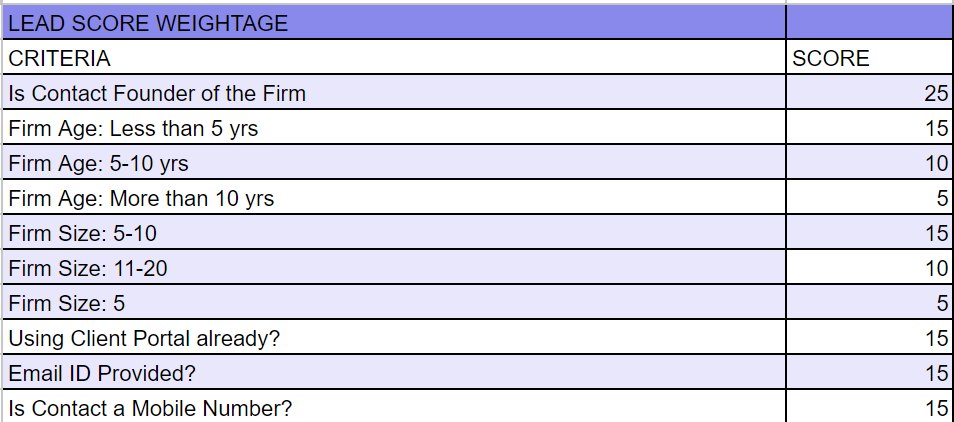

# Importing Dependencies

In [17]:
# Importing our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline
import pandas as pd

## Data Preparation for ML Model

In [18]:
# Specifying the path to the Excel file

file_path = 'lawfirmdata_cleaned_100.csv'

# Reading the Excel file into a DataFrame
lawfirm_df = pd.read_csv(file_path)

print("Dataset size = ", lawfirm_df.shape)

# Printing the first 5 rows of the DataFrame
lawfirm_df.head(2)

Dataset size =  (100, 30)


,Unnamed: 0,First Name,Last Name,Title,Company,Seniority,# Employees,Keywords,Website,Company Address,...,Founder,Firm Age,Mobile Number,year_founded_labels,year_score,FirmSize_labels,FirmSize_score,is_valid,is_valid_regex,is_valid_email
0,0,Dennis,Brager,"Owner, Tax Litigation Attorney","Brager Tax Law Group, A P.C.",Founder,10,"tax litigation, tax controversy, tax evasion, ...",http://www.bragertaxlaw.com,"11400 West Olympic Boulevard, Los Angeles, Cal...",...,1,37,0,More than 10 Years,5,10-May,15,1,1,1
1,1,Charles,Spinner,Attorney/Owner,Spinner Law Firm P.A.,Founder,7,NaN,http://www.spinnerlawfirm.com,"Wesley Chapel, Florida, United States",...,1,21,1,More than 10 Years,5,10-May,15,0,0,0


In [19]:
# Dropping the non-beneficial columns
lawfirm_scores_df = lawfirm_df[['Founder', 'year_score', 'FirmSize_score', 'Client Login', 'is_valid_email','Mobile Number']]
print(lawfirm_scores_df.columns)
lawfirm_scores_df.head(10)

Index(['Founder', 'year_score', 'FirmSize_score', 'Client Login',
       'is_valid_email', 'Mobile Number'],
      dtype='object')


,Founder,year_score,FirmSize_score,Client Login,is_valid_email,Mobile Number
0,1,5,15,0,1,0
1,1,5,15,0,0,1
2,1,10,5,0,1,1
3,1,5,5,0,1,1
4,1,15,5,0,1,1
5,1,5,15,0,1,1
6,1,5,15,0,0,1
7,1,10,5,0,1,1
8,1,5,5,0,1,1
9,1,0,15,0,1,0


In [20]:
# Assigning scores based upon Lead Score Matrix
lawfirm_scores_df.loc[:, 'is_valid_email'] = lawfirm_scores_df['is_valid_email'].replace(1, 15)
lawfirm_scores_df['is_valid_email'].head()

<ipython-input-20-ff286222c910>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lawfirm_scores_df.loc[:, 'is_valid_email'] = lawfirm_scores_df['is_valid_email'].replace(1, 15)


0    15
1     0
2    15
3    15
4    15
Name: is_valid_email, dtype: int64

In [21]:
# Assigning scores based upon Lead Score Matrix
lawfirm_scores_df['Founder'] = lawfirm_scores_df['Founder'].replace(1, 25)
lawfirm_scores_df['Founder'].head()

<ipython-input-21-cb0ec80b709d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lawfirm_scores_df['Founder'] = lawfirm_scores_df['Founder'].replace(1, 25)


0    25
1    25
2    25
3    25
4    25
Name: Founder, dtype: int64

In [22]:
lawfirm_scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Founder         100 non-null    int64
 1   year_score      100 non-null    int64
 2   FirmSize_score  100 non-null    int64
 3   Client Login    100 non-null    int64
 4   is_valid_email  100 non-null    int64
 5   Mobile Number   100 non-null    int64
dtypes: int64(6)
memory usage: 4.8 KB


In [23]:
lawfirm_scores_df['Client Login'].value_counts()

0    98
1     2
Name: Client Login, dtype: int64

In [24]:
# Assigning scores based upon Lead Score Matrix
lawfirm_scores_df['Client Login'] = lawfirm_scores_df['Client Login'].replace(1, 15).astype(int)

lawfirm_scores_df['Client Login'].head(10)

<ipython-input-24-08c8c6d62769>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lawfirm_scores_df['Client Login'] = lawfirm_scores_df['Client Login'].replace(1, 15).astype(int)


0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Client Login, dtype: int64

In [25]:
# Assigning scores based upon Lead Score Matrix
lawfirm_scores_df['Mobile Number'] = lawfirm_scores_df['Mobile Number'].replace(1, 15)
lawfirm_scores_df['Mobile Number'].head(10)

<ipython-input-25-47d1629e2bd8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lawfirm_scores_df['Mobile Number'] = lawfirm_scores_df['Mobile Number'].replace(1, 15)


0     0
1    15
2    15
3    15
4    15
5    15
6    15
7    15
8    15
9     0
Name: Mobile Number, dtype: int64

In [26]:
# Creating the score as the target variable column
lawfirm_scores_df['Lead Score'] = lawfirm_scores_df['Founder'] + lawfirm_scores_df['year_score'] + lawfirm_scores_df['FirmSize_score'] + lawfirm_scores_df['Client Login'] + lawfirm_scores_df['is_valid_email'] + lawfirm_scores_df['Mobile Number']

<ipython-input-26-b274b57355c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lawfirm_scores_df['Lead Score'] = lawfirm_scores_df['Founder'] + lawfirm_scores_df['year_score'] + lawfirm_scores_df['FirmSize_score'] + lawfirm_scores_df['Client Login'] + lawfirm_scores_df['is_valid_email'] + lawfirm_scores_df['Mobile Number']


In [27]:
#Looking at the modified dataframe
lawfirm_scores_df.head(10)

,Founder,year_score,FirmSize_score,Client Login,is_valid_email,Mobile Number,Lead Score
0,25,5,15,0,15,0,60
1,25,5,15,0,0,15,60
2,25,10,5,0,15,15,70
3,25,5,5,0,15,15,65
4,25,15,5,0,15,15,75
5,25,5,15,0,15,15,75
6,25,5,15,0,0,15,60
7,25,10,5,0,15,15,70
8,25,5,5,0,15,15,65
9,25,0,15,0,15,0,55


In [28]:
# Determining the number of unique values in each column.
lawfirm_scores_df.nunique()

Founder            1
year_score         4
FirmSize_score     3
Client Login       2
is_valid_email     2
Mobile Number      2
Lead Score        10
dtype: int64

In [29]:
# Determining the number of unique value count for target variable
lawfirm_scores_df['Lead Score'].value_counts()

65    30
75    18
70    15
60    13
50     9
45     5
55     4
80     3
90     2
35     1
Name: Lead Score, dtype: int64

In [30]:
# Split our preprocessed data into our features and target arrays
# Separating the X variable, the features
X = lawfirm_scores_df.drop('Lead Score', axis = 1)
X.head()

,Founder,year_score,FirmSize_score,Client Login,is_valid_email,Mobile Number
0,25,5,15,0,15,0
1,25,5,15,0,0,15
2,25,10,5,0,15,15
3,25,5,5,0,15,15
4,25,15,5,0,15,15


In [31]:
# Separating the y variable, the labels
y = lawfirm_scores_df['Lead Score'].ravel()
y

array([60, 60, 70, 65, 75, 75, 60, 70, 65, 55, 60, 50, 60, 75, 65, 65, 65,
       50, 75, 70, 80, 75, 60, 60, 60, 55, 75, 65, 45, 50, 60, 45, 60, 90,
       75, 50, 45, 65, 35, 65, 70, 70, 50, 70, 50, 80, 75, 55, 65, 65, 75,
       65, 65, 65, 65, 65, 65, 70, 55, 70, 65, 75, 65, 70, 65, 70, 70, 75,
       45, 90, 75, 75, 60, 75, 65, 75, 65, 60, 75, 50, 65, 65, 65, 65, 70,
       65, 75, 70, 70, 70, 45, 80, 50, 60, 65, 65, 65, 75, 65, 50])

In [32]:
# Splitting the preprocessed data into a training and testing dataset
# Assigning a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=1)

In [33]:
# Creating a StandardScaler instances
scaler = StandardScaler()

# Fitting the StandardScaler
X_scaler = scaler.fit(X_train)

# Scaling the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Looking at the training and test data sizes
print(X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape)

(75, 6) (25, 6) (75,) (25,)


## Compile, Train and Evaluate the Model

In [34]:
# Setting up the Random Forest Model
rf_model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [35]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [36]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [37]:
predictions

array([65, 70, 75, 65, 60, 50, 45, 65, 80, 70, 50, 65, 65, 65, 65, 60, 45,
       50, 75, 60, 70, 75, 75, 65, 70])

In [38]:
y_test

array([65, 70, 90, 65, 60, 50, 45, 65, 90, 70, 50, 65, 65, 65, 65, 60, 45,
       50, 75, 60, 70, 75, 75, 65, 70])

In [39]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

[[2 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0]
 [0 0 0 8 0 0 0 0]
 [0 0 0 0 4 0 0 0]
 [0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0]]


In [40]:
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
acc_score

0.92

In [41]:
# Displaying results
print("Confusion Matrix")
display(cm)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


array([[2, 0, 0, 0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0, 0, 0],
       [0, 0, 0, 8, 0, 0, 0, 0],
       [0, 0, 0, 0, 4, 0, 0, 0],
       [0, 0, 0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0]])

Accuracy Score : 0.92
Classification Report
              precision    recall  f1-score   support

          45       1.00      1.00      1.00         2
          50       1.00      1.00      1.00         3
          60       1.00      1.00      1.00         3
          65       1.00      1.00      1.00         8
          70       1.00      1.00      1.00         4
          75       0.75      1.00      0.86         3
          80       0.00      0.00      0.00         0
          90       0.00      0.00      0.00         2

    accuracy                           0.92        25
   macro avg       0.72      0.75      0.73        25
weighted avg       0.89      0.92      0.90        25



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [42]:
# Utilizing the Random Forests (sklearn) module to calculate feature importance
importances = rf_model.feature_importances_
# Sorting the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.4857506661511518, 'year_score'),
 (0.23602244152630594, 'FirmSize_score'),
 (0.19174958047758006, 'is_valid_email'),
 (0.08647731184496232, 'Mobile Number'),
 (0.0, 'Founder'),
 (0.0, 'Client Login')]

<Axes: title={'center': 'Impact of Criteria on Lead Score Prediction'}, xlabel='score', ylabel='Lead Score Criteria'>

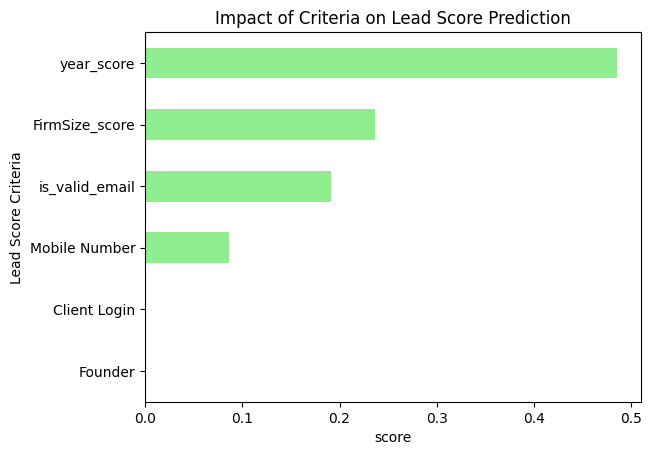

In [43]:
# Visualizing the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', xlabel="score", ylabel="Lead Score Criteria", title='Impact of Criteria on Lead Score Prediction', legend=False)

### Results and Conclusion

The project developed a Random Forest Classifier with 10, 50, 100, and 500 decision trees to predict the lead score of a firm.
The model accuracy score with 10 decision trees is 0.9643, whereas with 50, 100, and 500 decision trees, it achieves 0.97321. As expected, accuracy increases with the number of decision trees in the model. Moreover, beyond 50 decision  trees, the accuracy remains consistent, thus indicating 50 as the optimal value for n_estimators.
The Random Forest model has been employed to identify solely the significant features, including Firm Age, Firm Size, the presence of a valid email ID on the website, the designation of the contact number as a mobile number, the existence of a client login option on the website, and whether the contact is a founder or not.
Confusion matrix and classification reports are additional tools to visualize model performance. In this case, they also demonstrated good performance.